### Library

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
import time

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
import keras.backend as K

import re
import random
import string

Using TensorFlow backend.


In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('rslp')
#Word Stemmer
from nltk.stem import RSLPStemmer
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [0]:
#For remove accents
!pip install unidecode
import unidecode

     |████████████████████████████████| 245kB 3.2MB/s 


In [0]:
from urllib.request import urlretrieve
def download(url, file):
  if not os.path.isfile(file):
    print("Download file ... "+ file + "...")
    urlretrieve(url,file)
    print("Download completed . . .")

In [0]:
download('https://meli-data-challenge.s3.amazonaws.com/train.csv.gz', 'train.csv.gz')
download('https://meli-data-challenge.s3.amazonaws.com/test.csv', 'test.csv')
download('https://meli-data-challenge.s3.amazonaws.com/sample_submission.csv', 'sample_submission.csv')
print('Files downloaded . . .')

Download file ... train.csv.gz...
Download completed . . .
Download file ... test.csv...
Download completed . . .
Download file ... sample_submission.csv...
Download completed . . .
Files downloaded . . .


### Function Plot Learning Curves

In [0]:
def plotLearningCurves(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
   
    
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.tight_layout()
    
    plt.show()

### Function Indexes with zero

In [0]:
#Drop row if length title is zero
def indexesZeroTrain(data):
    indexes = data[data['title_nopunc'].apply(len) == 0].index
    print(len(indexes))
    data.drop(indexes, inplace=True)
    #print(data['title'][indexes])
    #data['title_nopunc'][indexes] = 'nothing'
    return data

#Set to 'nothing' title if length is zero
def indexesZeroTest(data):
    indexes = data[data['title_nopunc'].apply(len) == 0].index
    print(len(indexes))
    data['title'][indexes] = 'nothing'
    data['title_nopunc'][indexes] = 'nothing'
    return data

### Function Resize Dataset

In [0]:
def getTrainDataset( size, language):
    if (language == 'portuguese'):
        testSize = size / trainPortuguese.shape[0]
        _, X_test = train_test_split(trainPortuguese, test_size=testSize, random_state=101, stratify=trainPortuguese.category)
        return X_test
    elif (language == 'spanish' ):
        testSize = size / trainSpanish.shape[0]
        X_train, X_test = train_test_split(trainSpanish, test_size=testSize, random_state=101, stratify=trainSpanish.category)
        return X_test
    else:
        testSize = size / train.shape[0]
        X_train, X_test = train_test_split(train, test_size=testSize, random_state=101, stratify=train.category)
        return X_test

### Function Remove StopWords and Ponctuation

In [0]:
#Word Stemmer
portugueseStemmer = SnowballStemmer("portuguese")
stemmer = RSLPStemmer()

#Remove Ponctuation and Numbers
#removeChar = '0123456789' + string.punctuation
removeChar = string.punctuation

notUseful = ['kit', 'frete', 'envio', 'gratis', 'pronta', 'entrega', 'nova', 'usado', 'usada',
             'novo', 'original', 'cm', 'mm', 'promocao', 'combo', 'kg', 'nuevo', 
             'cm', 'mini', 'oferta', 'litros', 'negro', 'set', 'par', 'promocao', 'pack', 
             'kg', 'completo', 'profissional', 'black', 'grande', 'nuevo', 'nueva', 
             'tipo', 'ml', 'metros', 'universal', 'bivolt', 'new', 'pcs', 'completa', 
             'red', 'ano', 'ii', 'branco', 'branca', 'preto', 'preta', 'azul', 
             'vermelho', 'vermelha', 'rosa', 'verde', 'amarelo']
#stopWordsData = stopwords.words('portuguese') + list(string.ascii_lowercase) + colors + notUseful
stopWordsData = stopwords.words('spanish') + stopwords.words('portuguese') + list(string.ascii_lowercase) + notUseful

def removeStopColumn(column, language):
    if (language == 'portuguese'):
        stopWordsData = stopwords.words('portuguese') + list(string.ascii_lowercase)
    elif (language == 'spanish' ):
        stopWordsData = stopwords.words('spanish') + list(string.ascii_lowercase)
    else:
        stopWordsData = stopwords.words('spanish') + stopwords.words('portuguese') + list(string.ascii_lowercase)
    
    return column.apply(lambda line: removeStopLine(line))
    

def removeStopLine(line):
    #Remove accents
    text = unidecode.unidecode(line)
    #Replace "./-" for espace
    text = text.translate(str.maketrans(',./-', '    '))
    #Remove ponctuation
    text = text.translate(str.maketrans('', '', removeChar))
    listWords = text.split()
    #listWords = nlp(text)

    #Remove StopWords and Numbers
    #text = [portugueseStemmer.stem(word) for word in listWords if (word not in stopWordsData and not(word.isdigit()))]
    #text = [word.lemma_ for word in listWords if (word.lemma_ not in stopWordsData and not(re.search('\d+', word.lemma_)))]
    text = [word for word in listWords if (word not in stopWordsData and not(re.search('\d+', word)))]
    text = ' '.join(text)
    return text

### Read Datasets

In [0]:
train = pd.read_csv("train.csv.gz")
test = pd.read_csv("test.csv")
#sample_sub = pd.read_csv("sample_submission.csv")

#Convert column title to lower case
train['title'] = train["title"].map(lambda x: x.lower())

In [0]:
train.shape

(20000000, 4)

### Split in Realiable Dataset

In [0]:
trainReliable = train[train['label_quality'] == 'reliable']
trainUnreliable = train[train['label_quality'] == 'unreliable']

print("Reliable: ", trainReliable.shape, 'Unrealible: ', trainUnreliable.shape)
trainReliable.drop('label_quality', axis=1, inplace=True)
#trainReliable.describe()

_, trainUnreliable = train_test_split(trainUnreliable, test_size=0.07, random_state=42, stratify=trainUnreliable.category)

trainReliable = trainReliable.append(trainUnreliable)

trainReliable.shape

Reliable:  (1184245, 4) Unrealible:  (18815755, 4)


(2501348, 4)

### Train - Remove StopWords

In [0]:
#trainData = train.head(1000000)
init = time.time()

trainReliable['title_nopunc'] = trainReliable['title'].apply(removeStopLine)

print('Time to processed: ', time.time() - init)

trainReliable = indexesZeroTrain(trainReliable)

Time to processed:  187.10828065872192


707


### Test - Remove StopWords

In [0]:
test['title'] = test["title"].map(lambda x: x.lower())

init = time.time()

test["title_nopunc"] = test['title'].apply(removeStopLine)

print('Time to processed: ', time.time() - init)

test = indexesZeroTest(test)

test.drop('id', axis=1, inplace=True)

In [0]:
test.head()

,title,language,title_nopunc
0,kit maternidade bolsa-mala baby/bebe vinho men...,portuguese,maternidade bolsa mala baby bebe vinho menina
1,trocador de fraldas fisher price feminino rosa...,portuguese,trocador fraldas fisher price feminino portatil
2,motor ventoinha - fiat idea / palio 1.8 - a 04...,portuguese,motor ventoinha fiat idea palio
3,amortecedor mola batente d dir new civic 14 - ...,portuguese,amortecedor mola batente dir civic
4,cadeirinha de carro bebê princesa princess 9 a...,portuguese,cadeirinha carro bebe princesa princess kgs


### Word Embeeding

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
sizeTrain = trainReliable.shape[0]
sizeTest = test.shape[0]

In [0]:
trainReliable = trainReliable.append(test)

In [0]:
tokenizer = Tokenizer(num_words=20000)

In [0]:
init = time.time()

tokenizer.fit_on_texts(trainReliable['title_nopunc'])
X_train = tokenizer.texts_to_sequences(trainReliable['title_nopunc'])

maxlen = 5

X_train = pad_sequences(X_train, truncating='post',maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

X_train = tokenizer.sequences_to_texts(X_train)

#from operator import itemgetter
#sortedWords = sorted(tokenizer.word_counts.items(), key=itemgetter(1), reverse = True)

print('Time to processed: ', int(time.time() - init), ' segundos')

Time to processed:  132  segundos


In [0]:
vl = 2500123
print('Vocabulary length:',len(tokenizer.word_index))
print(trainReliable['title_nopunc'].iloc[vl])
print(X_train[vl])

Vocabulary length: 275671
filamento abs envio gratiscuotas printalot
filamento abs envio


In [0]:
trainReliable['title_nopunc'] = X_train

In [0]:
test = trainReliable.tail(sizeTest)

In [0]:
trainReliable = trainReliable.head(sizeTrain)

In [0]:
print('Size Train: ', trainReliable.shape , 'Size Test: ',test.shape)

Size Train:  (2500641, 4) Size Test:  (246955, 4)


In [0]:
indexes = trainReliable[trainReliable['title_nopunc'].apply(len) == 0].index
trainReliable['title_nopunc'][indexes] = trainReliable.loc[indexes]['title'].apply(removeStopLine)

In [0]:
indexes = test[test['title_nopunc'].apply(len) == 0].index
test['title_nopunc'][indexes] = test.loc[indexes]['title'].apply(removeStopLine)

### Split Train by Languages

In [0]:
trainPortuguese = trainReliable[trainReliable['language'] == 'portuguese']
trainSpanish = trainReliable[trainReliable['language'] == 'spanish']

In [0]:
i = trainPortuguese[trainPortuguese['category'] == 'PACKAGING_CONTAINERS'].index
ii = trainPortuguese[trainPortuguese['category'] == 'FIELD_HOCKEY_STICKS'].index
trainPortuguese.drop(i, inplace=True)
trainPortuguese.drop(ii, inplace=True)

In [0]:
ix = trainSpanish[trainSpanish['category'] == 'CHESS_CLOCKS'].index
trainSpanish.drop(ix, inplace=True)

In [0]:
trainPortuguese['category'].value_counts().tail()

COLD_FOOD_AND_DRINK_VENDING_MACHINES    4
BOXING_SPEED_BAGS                       4
COFFEE_VENDING_MACHINES                 3
MARTIAL_ARTS_FOOT_GUARDS                2
WAKEBOARD_BOOTS                         2
Name: category, dtype: int64

### Split Test by Languages

In [0]:
testPortuguese = test[test['language'] == 'portuguese']
testSpanish = test[test['language'] == 'spanish']

### Resize Dataset by defined size

In [0]:
sizeTrain = 150000

In [0]:
trainPort = getTrainDataset (sizeTrain, 'portuguese')

In [0]:
trainSpa = getTrainDataset (sizeTrain, 'spanish')

In [0]:
trainPort.describe()

,category,language,title,title_nopunc
count,150000,150000,150000,150000
unique,1567,1,150000,137362
top,CAR_SEAT_COVERS,portuguese,dvd player pioneer avh-a 208 bt bluetooth usb ...,protetor borda porta mala capo
freq,571,150000,1,193


### Vectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
#Vectorizer unique words and transform in matrix of 0 and 1
def createMatrixWords(listWords):
    vectorizer = CountVectorizer(dtype=np.int8)
    matriz = vectorizer.fit_transform(listWords)
    print("Total size of unique words: {}".format(len(vectorizer.get_feature_names())))
    return matriz

In [0]:
#Vectorizer unique words and transform in matrix of 0 and 1
def createMatrixWordsTFIDF(listWords):
    vectorizer = CountVectorizer(dtype=np.int8)
    matrix = vectorizer.fit_transform(listWords)
    tfidf_matrix = TfidfTransformer().fit_transform(matrix)
    #tfidf_matrix = tfidf_transformer.transform(messages_bow)
    print("Total size of unique words: {}".format(len(vectorizer.get_feature_names())))
    return tfidf_matrix

In [0]:
#Vectorizer 
def createMatrixWordsTFIDF_Gram(listWords):
    vectorizer = TfidfVectorizer(ngram_range=(1,2), analyzer='word') # You can still specify n-grams here.
    tfidf_matrix = vectorizer.fit_transform(listWords)
    print("Total size of unique words: {}".format(len(vectorizer.get_feature_names())))
    return tfidf_matrix

In [0]:
vectorizer = TfidfVectorizer(ngram_range=(2,2), analyzer='word') # You can still specify n-grams here.
tfidf_matrix = vectorizer.fit_transform(trainPort['title_nopunc'].tolist())
#print("Total size of unique words: {}".format(len(vectorizer.get_feature_names())))

frequencies = sum(tfidf_matrix).toarray()[0]
x = pd.DataFrame(frequencies, index=vectorizer.get_feature_names(), columns=['frequency'])
x.sort_values(by=['frequency'], ascending=False, inplace=True)
len(x.sort_values(by=['frequency']))

In [0]:
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(trainPort['title_nopunc'].tolist())

In [0]:
len(word_vectorizer.get_feature_names())

In [0]:
frequencies = sum(sparse_matrix).toarray()[0]

In [0]:
xi = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
xi.sort_values(by=['frequency'], ascending=False, inplace=True)
len(xi)

In [0]:
len(xi[xi['frequency'] > 1])

In [0]:
xi.tail(50)

In [0]:
matrix_Vector_Train_Port = createMatrixWordsTFIDF(trainPort['title_nopunc'].tolist())

Total size of unique words: 12021


In [0]:
matrix_Vector_Train_Spa = createMatrixWordsTFIDF(trainSpa['title_nopunc'].tolist())

Total size of unique words: 41064


### Vectorizer Words Train + Test

In [0]:
allWordsPort = trainPort['title_nopunc'].tolist() + testPortuguese['title_nopunc'].tolist()
allWordsSpa = trainSpa['title_nopunc'].tolist() + testSpanish['title_nopunc'].tolist()

#allWordsPort = trainPort['title'].tolist() + testPortuguese['title'].tolist()
#allWordsSpa = trainSpa['title'].tolist() + testSpanish['title'].tolist()

In [0]:
matrix_Vector_All_Words_Port = createMatrixWordsTFIDF(allWordsPort)

Total size of unique words: 16455


In [0]:
matrix_Vector_All_Words_Spa = createMatrixWordsTFIDF(allWordsSpa)

Total size of unique words: 17406


In [0]:
X_matrix_train_port = matrix_Vector_All_Words_Port[:trainPort.shape[0]]
X_matrix_test_port = matrix_Vector_All_Words_Port[trainPort.shape[0]:]
print("O dataset de treino portuguese tera um tamanho de {} e o dataset de test de {}".format(X_matrix_train_port.shape, X_matrix_test_port.shape))

O dataset de treino portuguese tera um tamanho de (150000, 16455) e o dataset de test de (121968, 16455)


In [0]:
X_matrix_train_spa = matrix_Vector_All_Words_Spa[:trainSpa.shape[0]]
X_matrix_test_spa = matrix_Vector_All_Words_Spa[trainSpa.shape[0]:]
print("O dataset de treino spanish tera um tamanho de {} e o dataset de test de {}".format(X_matrix_train_spa.shape, X_matrix_test_spa.shape))

O dataset de treino spanish tera um tamanho de (150000, 17406) e o dataset de test de (124987, 17406)


### Category Feature Scaling

In [0]:
target_names_port = trainPort['category'].unique()
target_dict_port = {n:i for i, n in enumerate(target_names_port)}
#len(target_names_port)

target_names_spa = trainSpa['category'].unique()
target_dict_spa = {n:i for i, n in enumerate(target_names_spa)}
#len(target_names_spa)

y_port = trainPort['category'].map(target_dict_port)
y_spa = trainSpa['category'].map(target_dict_spa)

y_cat_port = to_categorical(y_port)
y_cat_spa = to_categorical(y_spa)

print("Target dataset portuguese have a size: {} and the dataset spanish: {}".format(y_cat_port.shape, y_cat_spa.shape))

Target dataset portuguese have a size: (150000, 1567) and the dataset spanish: (150000, 1566)


### Word Embedding

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=10000)

In [0]:
tokenizer.fit_on_texts(trainData['title_nopunc'])
X_train = tokenizer.texts_to_sequences(trainData['title_nopunc'])

print('Vocabulary length:',len(tokenizer.word_index))
print(trainData['title_nopunc'].iloc[95])
print(X_train[95])

maxlen = 4

X_train = pad_sequences(X_train, truncating='post',maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

Vocabulary length: 55448
cruza palabras juego mesa palabras cruzadas fichas madera
[20, 3, 5619, 41]


In [0]:
x = tokenizer.sequences_to_texts(X_train)
#y = tokenizer.texts_to_matrix(trainData['title_nopunc'])
x[95]

'juego mesa fichas madera'

In [0]:
vl = 10589
print(trainData['title_nopunc'].iloc[vl])
print(X_train[vl])
print(x[vl])

flight case anvil pioneer djm
[   0 6604  193  464]
flight case pioneer


In [0]:
X_train[95]

array([0, 0, 0, 1], dtype=int32)

In [0]:
tokenizer.word_index['mesa']

1

In [0]:

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Conv1D, MaxPooling1D, Activation
from keras.layers import LSTM
from keras.datasets import imdb

In [0]:
max_features = 5000
maxlen = 5

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(trainPort['title_nopunc'])

X_train = tokenizer.texts_to_sequences(trainPort['title_nopunc'])

print('Loading data...')
print(len(X_train), 'train sequences')

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
print('X_train shape:', X_train.shape)

Loading data...
49987 train sequences
X_train shape: (49987, 5)


In [0]:
#Portuguese Dataset
X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_train, y_cat_port, test_size=0.18, random_state=101)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [0]:
embedding_size = 32

# Convolution
kernel_size = 3
filters = 64

# LSTM
lstm_output_size = 1024

# Training
batch_size = 32
epochs = 10

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D())
model.add(LSTM(lstm_output_size))
model.add(Dense(y_train_port.shape[1]))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Train...')
model.fit(X_train_port, y_train_port,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test_port, y_test_port))
score, acc = model.evaluate(X_test_port, y_test_port, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 40989 samples, validate on 8998 samples
Epoch 1/10
40989/40989 [==============================] - 32s 784us/step - loss: 6.8696 - acc: 0.0078 - val_loss: 6.2366 - val_acc: 0.0269
Epoch 2/10
40989/40989 [==============================] - 26s 629us/step - loss: 5.3317 - acc: 0.1153 - val_loss: 4.5068 - val_acc: 0.2492
Epoch 3/10
40989/40989 [==============================] - 26s 628us/step - loss: 3.8797 - acc: 0.3073 - val_loss: 3.6974 - val_acc: 0.3864
Epoch 4/10
40989/40989 [==============================] - 26s 628us/step - loss: 3.1670 - acc: 0.4105 - val_loss: 3.3688 - val_acc: 0.4407
Epoch 5/10
40989/40989 [==============================] - 26s 630us/step - loss: 2.7499 - acc: 0.4701 - val_loss: 3.1997 - val_acc: 0.4731
Epoch 6/10
40989/40989 [==============================] - 26s 626us/step - loss: 2.4888 - acc: 0.5092 - val_loss: 3.1310 - val_acc: 0.4830
Epoch 7/10
40989/40989 [==============================] - 26s 627us/step - loss: 2.2908 - acc

In [0]:
print('Build model...')

category_size = y_train.shape[1]

model = Sequential()
model.add(Embedding(max_features, 256))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(category_size, activation='softmax'))

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# try using different optimizers and different optimizer configs
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Train...')
model.fit(X_train_port, y_train_port, batch_size=batch_size, epochs=15, validation_split=0.18)

score, acc = model.evaluate(X_test_port, y_test_port,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 13443 samples, validate on 2951 samples
Epoch 1/15
13443/13443 [==============================] - 11s 784us/step - loss: 7.1056 - acc: 0.0045 - val_loss: 6.7735 - val_acc: 0.0075
Epoch 2/15
13443/13443 [==============================] - 8s 629us/step - loss: 5.9341 - acc: 0.0590 - val_loss: 5.4712 - val_acc: 0.1427
Epoch 3/15
13443/13443 [==============================] - 8s 622us/step - loss: 4.0139 - acc: 0.2936 - val_loss: 4.1876 - val_acc: 0.3477
Epoch 4/15
13443/13443 [==============================] - 8s 621us/step - loss: 2.4742 - acc: 0.5288 - val_loss: 3.7341 - val_acc: 0.4185
Epoch 5/15
13443/13443 [==============================] - 8s 619us/step - loss: 1.5842 - acc: 0.6844 - val_loss: 3.5955 - val_acc: 0.4507
Epoch 6/15
13443/13443 [==============================] - 8s 619us/step - loss: 1.0497 - acc: 0.7930 - val_loss: 3.5373 - val_acc: 0.4741
Epoch 7/15
13443/13443 [==============================] - 8s 619us/step - loss: 0.7183 - acc: 0.85

In [0]:
vocab_size = len(tokenizer.word_index) + 1

In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import LSTM, Dense

In [0]:
def makeModelFlatten():
  embedding_dim = 50

  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            input_length=maxlen))
  model.add(layers.Flatten())
  model.add(layers.Dense(y_cat_port.shape[1], activation='relu'))
  model.add(layers.Dense(y_cat_port.shape[1], activation='softmax'))
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  #model.summary()
  return model




In [0]:
#classificador = modelLSTM()
#history = classificador.fit(X_train, y_cat_port, epochs=5, verbose=1, validation_split=0.18, batch_size=10)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


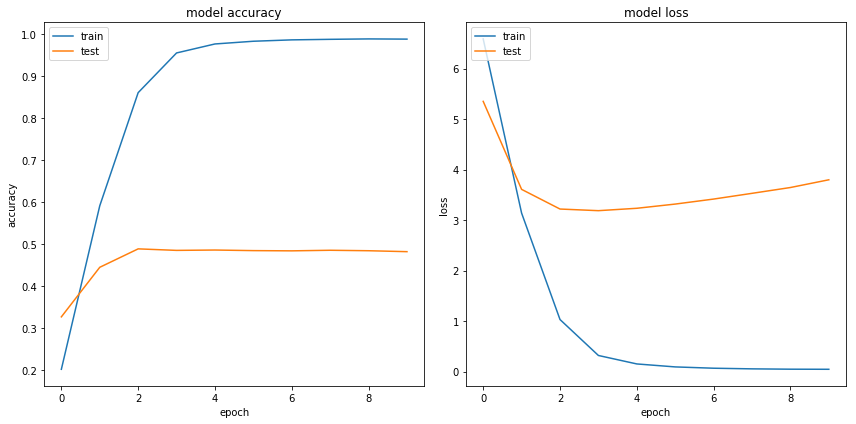

In [0]:
#200
plotLearningCurves(history)

In [0]:
def createModelConv():
    embedding_dim = 100

    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(y_cat_port.shape[1], activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    
    return model

In [0]:
clfConv = createModelConv()
history = clfConv.fit(X_train, y_cat_port, epochs=10, verbose=1, validation_split=0.18, batch_size=10)

TypeError: ignored

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


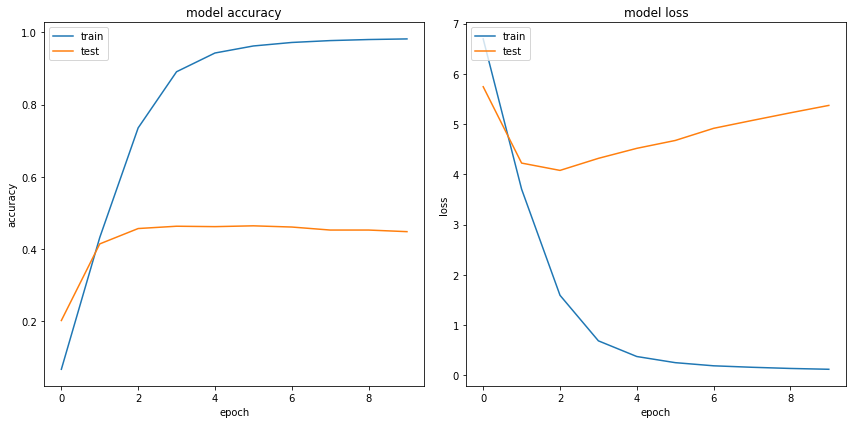

In [0]:
plotLearningCurves(history)

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(y_cat_port.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def createModelConv(num_filters, kernel_size, embedding_dim):
    K.clear_session()

    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    #model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    #model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Flatten())
    #model.add(layers.Dense(10, activation='relu'))
    #model.add(layers.Dense(1, activation='sigmoid'))
    model.add(layers.Dense(y_cat_port.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    return model
  
def create_model():
    # create model
    model = Sequential()
    model.add(layers.Embedding(vocab_size, 100, input_length=5))
    model.add(layers.Flatten())
    model.add(layers.Dense(y_cat_port.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    return model

In [0]:
batch_size = [64]
epochs = [7]
num_filters = [8,24,32]
#vocab_size = [5000]
embedding_dim =  [200,300,500]
#maxlen = [2,3,5]
#optimizers = ['rmsprop', 'adam']
#init = ['glorot_uniform', 'normal', 'uniform']
#batches = [5, 10, 20]
kernel_size=[7,10,15]


In [0]:
# create model
model = KerasClassifier(build_fn=createModelConv, verbose=1)

param_grid = dict(batch_size=batch_size, epochs=epochs,num_filters=num_filters, kernel_size=kernel_size, embedding_dim=embedding_dim)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_cat_port)

Epoch 1/7
19993/19993 [==============================] - 2s 121us/step - loss: 7.0521 - acc: 0.0130
Epoch 2/7
19993/19993 [==============================] - 2s 100us/step - loss: 5.4048 - acc: 0.2154
Epoch 3/7
19993/19993 [==============================] - 2s 100us/step - loss: 3.0486 - acc: 0.5156
Epoch 4/7
19993/19993 [==============================] - 2s 98us/step - loss: 1.6919 - acc: 0.7026
Epoch 5/7
19993/19993 [==============================] - 2s 103us/step - loss: 0.9428 - acc: 0.8360
Epoch 6/7
19993/19993 [==============================] - 2s 103us/step - loss: 0.5373 - acc: 0.9087
Epoch 7/7
19993/19993 [==============================] - 2s 105us/step - loss: 0.3243 - acc: 0.9480


In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.469914 using {'batch_size': 64, 'embedding_dim': 200, 'epochs': 7, 'kernel_size': 10, 'num_filters': 32}
0.464212 (0.006009) with: {'batch_size': 64, 'embedding_dim': 150, 'epochs': 7, 'kernel_size': 7, 'num_filters': 8}
0.461862 (0.005209) with: {'batch_size': 64, 'embedding_dim': 150, 'epochs': 7, 'kernel_size': 7, 'num_filters': 24}
0.463162 (0.004936) with: {'batch_size': 64, 'embedding_dim': 150, 'epochs': 7, 'kernel_size': 7, 'num_filters': 32}
0.463362 (0.003597) with: {'batch_size': 64, 'embedding_dim': 150, 'epochs': 7, 'kernel_size': 10, 'num_filters': 8}
0.460161 (0.006009) with: {'batch_size': 64, 'embedding_dim': 150, 'epochs': 7, 'kernel_size': 10, 'num_filters': 24}
0.459661 (0.004364) with: {'batch_size': 64, 'embedding_dim': 150, 'epochs': 7, 'kernel_size': 10, 'num_filters': 32}
0.462612 (0.004369) with: {'batch_size': 64, 'embedding_dim': 150, 'epochs': 7, 'kernel_size': 15, 'num_filters': 8}
0.462512 (0.005667) with: {'batch_size': 64, 'embedding_dim': 150, 

### Train Test Split

In [0]:
#Portuguese Dataset
#X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_matrix_train_port, y_port, test_size=0.2)

### Classifiers

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [0]:
#classifier = SVC(probability=True)

In [0]:
#classifier.fit(X_train_port, y_train_port)

In [0]:
#classifier.score(X_test_port, y_test_port)

### Training Model Portuguese

In [0]:
def createModel (inputSize, outputSize):
    #K.clear_session()

    model = Sequential()
    model.add(Dense(outputSize, input_shape=(inputSize,), activation='softmax'))
    #model.add(Dense(2048, activation='softmax'))
    #model.add(Dense(outputSize, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1), metrics=['accuracy'])
    
    return model

In [0]:
modelPort = createModel( X_matrix_train_port.shape[1], y_cat_port.shape[1])
historyPort = modelPort.fit(X_matrix_train_port, y_cat_port, epochs=5, verbose=1, validation_split=0.18)

Train on 123000 samples, validate on 27000 samples
Epoch 1/5
123000/123000 [==============================] - 147s 1ms/step - loss: 4.5999 - acc: 0.6354 - val_loss: 4.3421 - val_acc: 0.6908
Epoch 2/5
123000/123000 [==============================] - 147s 1ms/step - loss: 3.4702 - acc: 0.7591 - val_loss: 4.1718 - val_acc: 0.7095
Epoch 3/5
123000/123000 [==============================] - 147s 1ms/step - loss: 3.1442 - acc: 0.7880 - val_loss: 4.0464 - val_acc: 0.7226
Epoch 4/5
123000/123000 [==============================] - 147s 1ms/step - loss: 2.9433 - acc: 0.8048 - val_loss: 3.9838 - val_acc: 0.7295
Epoch 5/5
123000/123000 [==============================] - 147s 1ms/step - loss: 2.8270 - acc: 0.8136 - val_loss: 3.8732 - val_acc: 0.7379


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


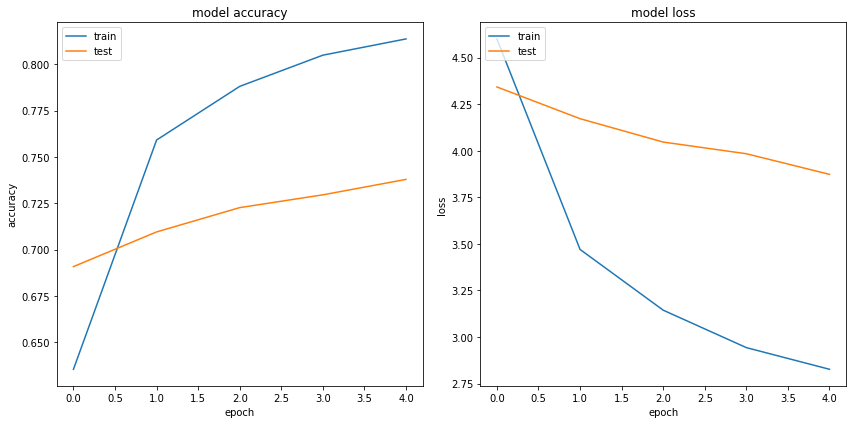

In [0]:
plotLearningCurves(historyPort)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


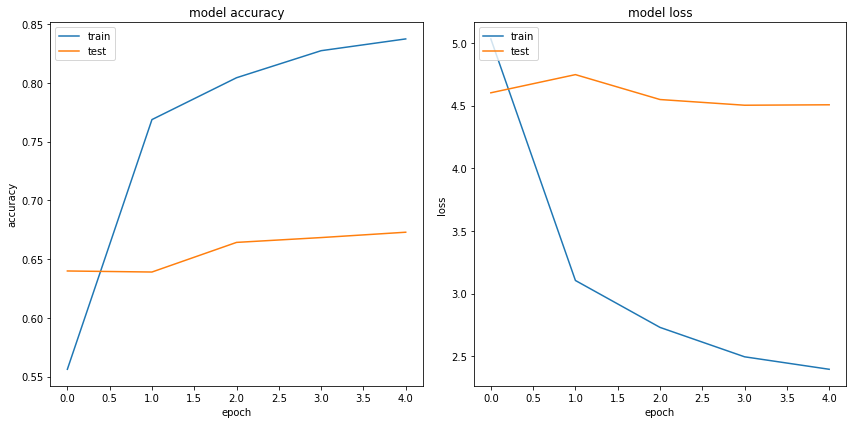

In [0]:
plotLearningCurves(historyPort)

In [0]:
result_port = modelPort.predict(X_matrix_test_port)

In [0]:
#resultTestPort = modelPort.evaluate(X_test_port, y_test_port)
#print("Test accuracy: {:3.1f} %".format(resultTestPort[1]*100))

In [0]:
modelSpa = createModel( X_matrix_train_spa.shape[1], y_cat_spa.shape[1])
historySpa = modelSpa.fit(X_matrix_train_spa, y_cat_spa, epochs=6, verbose=1, validation_split=0.18)

Train on 123000 samples, validate on 27000 samples
Epoch 1/6
123000/123000 [==============================] - 156s 1ms/step - loss: 4.6818 - acc: 0.6254 - val_loss: 4.3834 - val_acc: 0.6856
Epoch 2/6
123000/123000 [==============================] - 156s 1ms/step - loss: 3.4946 - acc: 0.7553 - val_loss: 4.2756 - val_acc: 0.7019
Epoch 3/6
123000/123000 [==============================] - 155s 1ms/step - loss: 3.1238 - acc: 0.7876 - val_loss: 4.1316 - val_acc: 0.7160
Epoch 4/6
123000/123000 [==============================] - 156s 1ms/step - loss: 2.9115 - acc: 0.8058 - val_loss: 4.0897 - val_acc: 0.7220
Epoch 5/6
123000/123000 [==============================] - 156s 1ms/step - loss: 2.7816 - acc: 0.8165 - val_loss: 4.0059 - val_acc: 0.7285
Epoch 6/6
123000/123000 [==============================] - 155s 1ms/step - loss: 2.6746 - acc: 0.8250 - val_loss: 3.9527 - val_acc: 0.7334


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


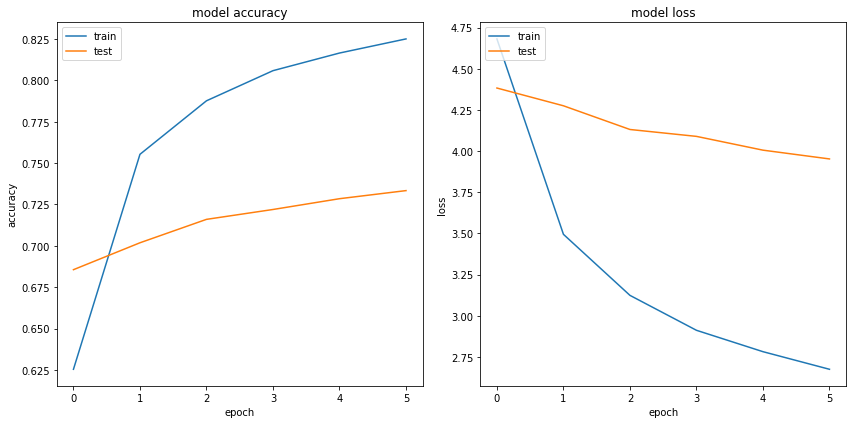

In [0]:
plotLearningCurves(historySpa)

In [0]:
result_spa = modelSpa.predict(X_matrix_test_spa)

## Dropout

In [0]:
from keras.layers import Dropout

In [0]:
matrix_Vector_Train_Port

In [0]:
classifier = Sequential()
classifier.add(Dense(2048, activation = 'relu', input_dim=matrix_Vector_Train_Port.shape[1]))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(2048, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(y_cat_port.shape[1], activation = 'softmax'))
classifier.compile(optimizer= 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [0]:
historyDropout = classifier.fit(matrix_Vector_Train_Port, y_cat_port, epochs=5, verbose=1, validation_split=0.18)

Train on 16394 samples, validate on 3599 samples
Epoch 1/5
16394/16394 [==============================] - 25s 2ms/step - loss: 6.3032 - acc: 0.1197 - val_loss: 4.6061 - val_acc: 0.3362
Epoch 2/5
16394/16394 [==============================] - 24s 1ms/step - loss: 2.6180 - acc: 0.5733 - val_loss: 3.0064 - val_acc: 0.5585
Epoch 3/5
16394/16394 [==============================] - 24s 1ms/step - loss: 0.7406 - acc: 0.8645 - val_loss: 2.9847 - val_acc: 0.5860
Epoch 4/5
16394/16394 [==============================] - 24s 1ms/step - loss: 0.2995 - acc: 0.9456 - val_loss: 3.1046 - val_acc: 0.5854
Epoch 5/5
16394/16394 [==============================] - 24s 1ms/step - loss: 0.1931 - acc: 0.9671 - val_loss: 3.0732 - val_acc: 0.5946


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


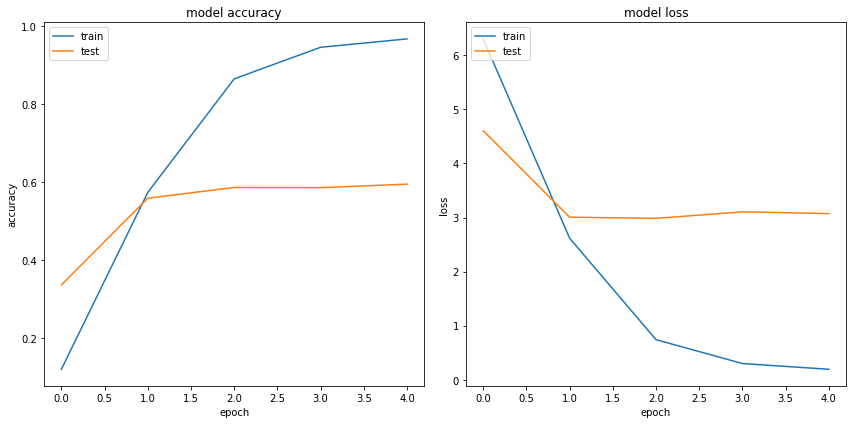

In [0]:
plotLearningCurves(historyDropout)

## Making Results

In [0]:
#result_port = modelPort.predict(X_matrix_test_port)

In [0]:
#result_spa = modelSpa.predict(X_matrix_test_spa)

In [0]:
result_port.shape

(121968, 1567)

In [0]:
result_test_port = np.argmax(result_port, axis=1)
result_test_spa = np.argmax(result_spa, axis=1)

In [0]:
testPortuguese['category'] = result_test_port
testSpanish['category'] = result_test_spa

In [0]:
target_dict_port_inv = dict(map(reversed, target_dict_port.items()))
testPortuguese['category'] = testPortuguese['category'].map(target_dict_port_inv)

In [0]:
target_dict_spa_inv = dict(map(reversed, target_dict_spa.items()))
testSpanish['category'] = testSpanish['category'].map(target_dict_spa_inv)

In [0]:
testPortuguese.head()

,category,language,title,title_nopunc
0,DIAPER_BAGS,portuguese,kit maternidade bolsa-mala baby/bebe vinho men...,maternidade bolsa mala baby bebe
1,TOY_TRAINS,portuguese,trocador de fraldas fisher price feminino rosa...,trocador fraldas fisher price feminino
2,ENGINE_COOLING_FAN_MOTORS,portuguese,motor ventoinha - fiat idea / palio 1.8 - a 04...,motor ventoinha fiat idea palio
3,AUTOMOTIVE_SHOCK_ABSORBER_BUMP_STOPS,portuguese,amortecedor mola batente d dir new civic 14 - ...,amortecedor mola batente dir civic
4,BABY_CAR_SEATS,portuguese,cadeirinha de carro bebê princesa princess 9 a...,cadeirinha carro bebe princesa princess


In [0]:
submission = testPortuguese[['category']]

In [0]:
submission = submission.append(testSpanish[['category']])

In [0]:
submission['id'] = submission.index

In [0]:
submission1 = submission[['id','category']]

In [0]:
submission1.head()

,id,category
0,0,DIAPER_BAGS
1,1,TOY_TRAINS
2,2,ENGINE_COOLING_FAN_MOTORS
3,3,AUTOMOTIVE_SHOCK_ABSORBER_BUMP_STOPS
4,4,BABY_CAR_SEATS


In [0]:
submission1.to_csv('submission.csv', index=False)

In [0]:
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/submission_wordEmbbeding_1_29-09.csv
/content/test.csv
/content/submission_wordEmbbeding_1_29_09.csv
/content/train.csv.gz
/content/sample_submission.csv
/content/submission.csv
/content/.config/active_config
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/.metricsUUID
/content/.config/configurations/config_default
/content/.config/logs/2019.08.27/16.17.00.530950.log
/content/.config/logs/2019.08.27/16.17.22.686467.log
/content/.config/logs/2019.08.27/16.17.21.663235.log
/content/.config/logs/2019.08.27/16.17.17.407104.log
/content/.config/logs/2019.08.27/16.17.07.367707.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [0]:
os.chdir(r'/content')

In [0]:
#files.download('submission.csv')

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'submission.csv'})
uploaded.SetContentFile('submission.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1YOe1tAgBKbhv7PA1EnYD-N_-Qik_J3fz
